In [1]:
!echo 'hello world'

hello world


In [8]:
# API KEYS
import os
from api_keys import GROQ_API_KEY, JINA_API_KEY
os.environ['GROQ_API_KEY'] = GROQ_API_KEY

In [1]:
# here we need to have "GROQ_API_KEY" as environment variable, key is added to environment, not mentioned here

## MESSAGE object in Langchain
are used to represent the input and output of a chat model, as well as any additional context or metadata that may be associated with a conversation.
Message typically consists of the following pieces of information:

Role: The role of the message (e.g., "user", "assistant").
role field - system, user, tool, assistant, function (openai earlier called function, now replaced by tool)

Content: The content of the message (e.g., text, multimodal data).

Additional metadata: id, name, token usage and other model-specific metadata.

Langchain also has types of message class to specify

SystemMessage: corresponds to system role

HumanMessage: corresponds to user role

AIMessage: corresponds to assistant role

AIMessageChunk: corresponds to assistant role, used for streaming responses

ToolMessage: corresponds to tool role


In [4]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"}
]

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage

messages_2 = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Who won the world series in 2020?")
]

## PROMPT TEMPLATE
We can also directly pass these messages to the LLM, but Prompt templates are a concept in LangChain designed to assist with this transformation. They take in raw user input and return data (a prompt) that is ready to pass into a language model.

Prompts also support multiple roles such as system, user, assistant, tool etc

In [6]:
from langchain_core.prompts import ChatPromptTemplate

In [7]:
system_template = "Act as a translating assistant that translates from {source_language} to {target_language}."
user_template = "{text}"

prompt_template = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("user", user_template),
])

final_prompt = prompt_template.invoke({"source_language" : "English", "target_language": "Hindi", "text": "What are you doing here?"})
final_prompt

ChatPromptValue(messages=[SystemMessage(content='Act as a translating assistant that translates from English to Hindi.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What are you doing here?', additional_kwargs={}, response_metadata={})])

## CHAT Model
Chat models are language models that use a sequence of messages as inputs and return messages as outputs (as opposed to using plain text).

Langchain provides API calling integrations through OpenAI, MistralAI, Cohere, Grow, etc GROQ IS FREE

In case to use the LLM without API (locally), libraries like Huggingface provides langchain wrappers with can be used over it to put in langchain

In [8]:
from langchain.chat_models import init_chat_model

In [9]:
llm_model = init_chat_model(model="llama3-8b-8192", model_provider = "groq")

In [10]:
llm_model

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10799cb90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1076ba610>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [11]:
llm_model.invoke(final_prompt)

AIMessage(content='मैं यहाँ क्या कर रहा हूँ?\n\n(Translation: Main yahaan kya kar raha hoon?)\n\nIf you want me to provide the translation in a sentence format, here it is:\n\nमैं आपके पास क्या करने के लिए आया हूँ।\n\n(Translation: Main aapke paas kya karna ke liye aaya hoon, which means "I have come to do something for you.")', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 33, 'total_tokens': 132, 'completion_time': 0.0825, 'prompt_time': 0.012418797, 'queue_time': 0.068451392, 'total_time': 0.094918797}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-6bb4e0de-6f7d-497d-b055-05d913c6dd8e-0', usage_metadata={'input_tokens': 33, 'output_tokens': 99, 'total_tokens': 132})

In [12]:
# can also use messages directly

llm_model.invoke(messages)

AIMessage(content="The Los Angeles Dodgers won the World Series in 2020, defeating the Tampa Bay Rays in the series 4 games to 2. It was the Dodgers' first World Series title since 1988.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 31, 'total_tokens': 74, 'completion_time': 0.035833333, 'prompt_time': 0.011644346, 'queue_time': 0.183946273, 'total_time': 0.047477679}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'stop', 'logprobs': None}, id='run-ac6ce7a3-f6bc-438e-85bb-362129e2f863-0', usage_metadata={'input_tokens': 31, 'output_tokens': 43, 'total_tokens': 74})

## Chat History
Chat history is a record of the conversation between the user and the chat model. It is used to maintain context and state throughout the conversation.

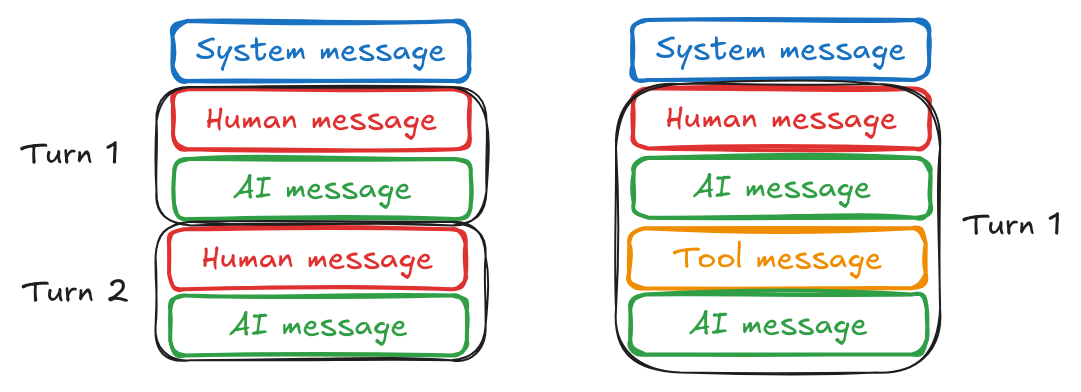

## Tool / Function


The tool abstraction in LangChain associates a Python function with a schema that defines the function's name, description and expected arguments.

Tools can be passed to chat models that support tool calling allowing the model to request the execution of a specific function with specific inputs.

This is same as what OPENAI calls function calling
The key attributes that correspond to the tool's schema:

name: The name of the tool.
description: A description of what the tool does.
args: Property that returns the JSON schema for the tool's arguments.

The key methods to execute the function associated with the tool:

invoke: Invokes the tool with the given arguments.
ainvoke: Invokes the tool with the given arguments, asynchronously.

1. The recommended way to create tools is using the @tool decorator. After defining a function, you can decorate it with @tool

2. By sub-classing from BaseTool -- This is the most flexible method, it provides the largest degree of control

Tool calling uses the the arguments and their description to create a json schema which can be used with LLM, we can use multiple methods to provide it in function apart from direct method, we can also use pydantic BaseModel to create this and pass to function

In [14]:
# tool creation
# name, description, argument type is important here
from langchain_core.tools import tool

@tool
def multiply_numbers(a: int, b: int) -> int:
  """
  multiplying two integer numbers
  """
  return a*b

In [15]:
multiply_numbers.name
multiply_numbers.description
multiply_numbers.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [16]:
# can also use BaseModel to give function information
from pydantic import BaseModel, Field

class MultiplyInput(BaseModel):
  a: int = Field(description = "first number")
  b: int = Field(description = "second number")

@tool(args_schema = MultiplyInput)
def multiply_numbers(a: int, b: int) -> int:
  """
  multiplying two integer numbers
  """
  return a*b


In [17]:
multiply_numbers.name
multiply_numbers.description
multiply_numbers.args

{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'},
 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}

In [35]:
# can also inherit BaseTool class to create a tool class
from typing import Type
from langchain_core.tools import BaseTool

class MultiplyNumbers(BaseTool):
  # here mentioning type of arguments is required
  name: str = "multiply_numbers"
  description: str = "multiplying two integer numbers"
  args_schema: Type[BaseModel] = MultiplyInput
  #return_direct: bool = True

  def _run(self, a: int, b: int) -> int:
    return a*b

In [29]:
multiply = MultiplyNumbers()
multiply.name
multiply.description
multiply.args

{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'},
 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}

# Tool calling / Function Calling

Tool calling is built for cases where the LLM directly has to interact with system, such as databases, external APIs which have a particular schema,

It can be done as 3 step process

1. Took creation -> Refer above, use tool decorator or BaseTools class
2. Tool binding --> tool needs to be connected to a model that supports tool calling. This gives the model awareness of the tool & its schema
3. Tool calling -> When appropriate, the model can decide to call a tool and ensure its response conforms to the tool's input schema
4. Tool execution -> using methods like tool.invoke() to call the tool

In [30]:
all_tools = [multiply]

# will use the existing model instance for binding. ONLY MODELS WHICH SUPPORT FUNCTION CALLING CAN BE USED
llm_with_tools = llm_model.bind_tools(tools = all_tools)

A key principle of tool calling is that the model decides when to use a tool based on the input's relevance. The model doesn't always need to call a tool. For example, given an unrelated input, the model would not call the tool:


In [31]:
llm_with_tools.invoke("Hello mr AI model")

AIMessage(content='Hello!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 1893, 'total_tokens': 1896, 'completion_time': 0.0025, 'prompt_time': 0.315216676, 'queue_time': -0.37199909999999997, 'total_time': 0.317716676}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'stop', 'logprobs': None}, id='run-dea82312-7f43-4f03-a743-b08562ce1f6e-0', usage_metadata={'input_tokens': 1893, 'output_tokens': 3, 'total_tokens': 1896})

In [32]:
result = llm_with_tools.invoke("Hello mr AI model")
result.tool_calls

[]

In [33]:
llm_with_tools.invoke("Let's do some math. What is 14 multiplied by 20")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xqf9', 'function': {'arguments': '{"a":14,"b":20}', 'name': 'multiply_numbers'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 947, 'total_tokens': 1020, 'completion_time': 0.060833333, 'prompt_time': 0.264215732, 'queue_time': 0.15528949200000003, 'total_time': 0.325049065}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4d699e14-a7cd-49fc-bf48-55dea8eb29e7-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'a': 14, 'b': 20}, 'id': 'call_xqf9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 73, 'total_tokens': 1020})

In [58]:
result = llm_with_tools.invoke("Let's do some math. What is 14 multiplied by 20")
result.tool_calls

[{'name': 'multiply_numbers',
  'args': {'a': 14, 'b': 20},
  'id': 'call_0k0t',
  'type': 'tool_call'}]

## Tool Execution / LLM excuting the function

Till here model has extracted the arguments for the function based on the tool calling.
Next we will have to make this into a Tool Message and feed that back again to the model
so model will execute that function with the arguments and give back the results

Also, here we will have to make give the model a chain of conversation so model can have context and give out response for it

For creating the chain we can use chat prompt template or use classes like HumanMessage, AiMessage, ToolMessage etc

In [50]:
from langchain_core.messages import ToolMessage, HumanMessage

In [56]:
tm = multiply.invoke(result.tool_calls[0])
tm

ToolMessage(content='280', name='multiply_numbers', tool_call_id='call_cp87')

In [49]:
llm_with_tools.invoke([tm])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_323n', 'function': {'arguments': '{"a":280,"b":2}', 'name': 'multiply_numbers'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 951, 'total_tokens': 1031, 'completion_time': 0.066666667, 'prompt_time': 0.135945637, 'queue_time': 0.13147052399999998, 'total_time': 0.202612304}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6a6771ae9c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8fbd2bcd-ee9a-42e4-bf63-d17f64c6c000-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'a': 280, 'b': 2}, 'id': 'call_323n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 951, 'output_tokens': 80, 'total_tokens': 1031})

In [53]:
llm_with_tools.invoke([HumanMessage("multiply 2 and 9")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_p861', 'function': {'arguments': '{"a":2,"b":9}', 'name': 'multiply_numbers'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 939, 'total_tokens': 1012, 'completion_time': 0.060833333, 'prompt_time': 0.127583148, 'queue_time': 0.09596678, 'total_time': 0.188416481}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-30ea9e28-6abc-49f5-8db6-6af3ee900d82-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'a': 2, 'b': 9}, 'id': 'call_p861', 'type': 'tool_call'}], usage_metadata={'input_tokens': 939, 'output_tokens': 73, 'total_tokens': 1012})

In [79]:
def get_function_done(user_query, llm, function):
    messages_chain = [HumanMessage(user_query)]

    #running through llm to extract if there's any argument, and will add the response in chain if function is called
    # otherwise we will directly return the response from llm (meaning user didn't ask for multiplication)
    # code is above cells have already binded the function we created to the llm object
    llm_res = llm.invoke(messages_chain)
    if not llm_res.tool_calls:
        return llm_res.content
        
    messages_chain.append(llm_res)
    # we will use the extracted function args to send it back to llm in tool message form
    messages_chain.append(function.invoke(llm_res.tool_calls[0]))

    #now will give this entire chain of messages to llm to get an answer
    llm_out = llm.invoke(messages_chain)
    #print("CHAIN: ", messages_chain)
    #print("LLM OUT: ", llm_out)
    return llm_out.content, messages_chain

In [81]:
answer, chain = get_function_done("hii, can you multiply 2 and 3", llm_with_tools, multiply)
answer

'6'

## Structured Output from Model
When we need the model to response in a fix structured object (say JSON / Pydantic class/ dict etc), the output schema can be given to the model
and model can be made to response back in the same schema. THis is supported for models which support structured output

One approach is to include this schema in the prompt and ask nicely for the model to use it, this is not recommended. Several more powerful methods that utilizes native features in the model provider's API are available.

Tool calling can be used rather for this. simply bind our schema to a model as a tool! 

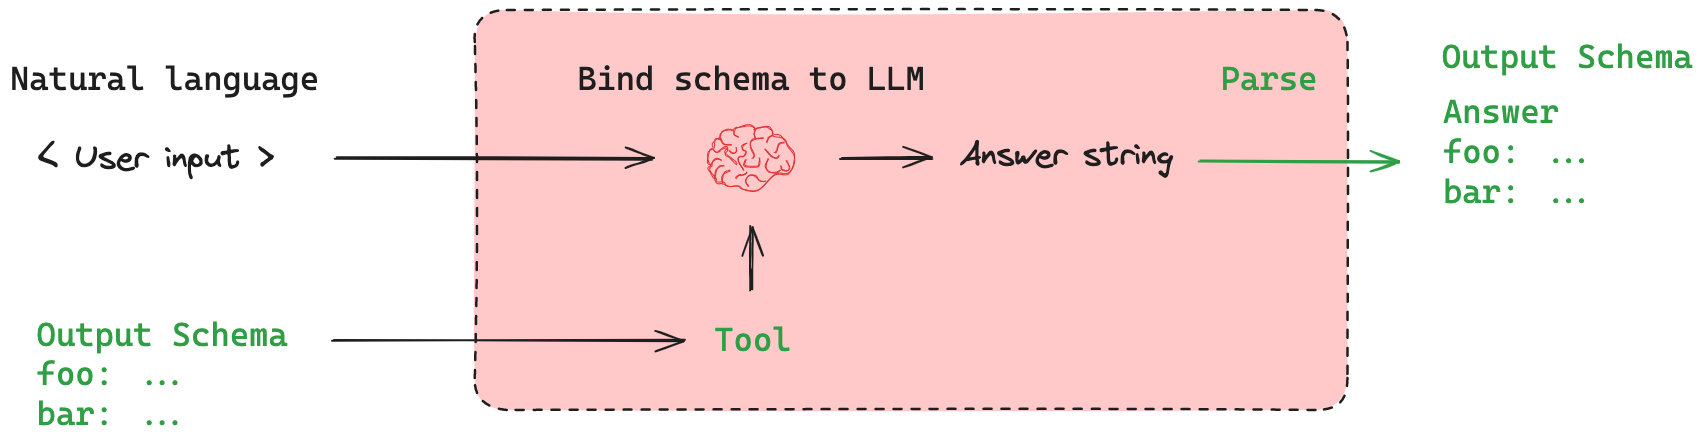


There are a few challenges when producing structured output with the above methods:

(1) When tool calling is used, tool call arguments needs to be parsed from a dictionary back to the original schema.

(2) In addition, the model needs to be instructed to always use the tool when we want to enforce structured output, which is a provider specific setting.

(3) When JSON mode is used, the output needs to be parsed into a JSON object.

With these challenges in mind, LangChain provides a helper function (with_structured_output()) to streamline the process.

This both binds the schema to the model as a tool and parses the output to the specified output schema.

In [77]:
class StructuredFormat(BaseModel):
    """Use this tool to structure your response to the user."""
    answer: str = Field(description="The answer to the user's question")
    followup_question: str = Field(description="A followup question the user could ask")

In [78]:
model_with_structured_out = llm_model.with_structured_output(StructuredFormat)

In [82]:
model_with_structured_out.invoke(chain)

StructuredFormat(answer='6', followup_question='What would you like to do with this result?')

In [83]:
model_with_structured_out.invoke("who won the indian elections in 2019")

StructuredFormat(answer='Narendra Modi', followup_question='He won the 2019 Indian general election as the Prime Minister of India')

## Document Loading

Langchain provides Document loading class which can be used to load alot of things in langchain like
1. pdf
2. Web pages
3. Json data
4. Csv
5. Data from Directory

Custom data loader can also be created by inheriting the base class BaseLoader
Langchain also provide lazy_loading() method to yield the document one by one (for cases when entire doc can't be read at once)
and also async loading for multiple threads

In [84]:
from typing import AsyncIterator, Iterator

from langchain_core.document_loaders import BaseLoader
from langchain_core.documents import Document


class CustomDocumentLoader(BaseLoader):
    """An example document loader that reads a file line by line."""

    def __init__(self, file_path: str) -> None:
        """Initialize the loader with a file path.

        Args:
            file_path: The path to the file to load.
        """
        self.file_path = file_path

    def lazy_load(self) -> Iterator[Document]:  # <-- Does not take any arguments
        """A lazy loader that reads a file line by line.

        When you're implementing lazy load methods, you should use a generator
        to yield documents one by one.
        """
        with open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

    # alazy_load is OPTIONAL.
    # If you leave out the implementation, a default implementation which delegates to lazy_load will be used!
    async def alazy_load(
        self,
    ) -> AsyncIterator[Document]:  # <-- Does not take any arguments
        """An async lazy loader that reads a file line by line."""
        # Requires aiofiles (install with pip)
        # https://github.com/Tinche/aiofiles
        import aiofiles

        async with aiofiles.open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            async for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

In [50]:
# for loading pdf documents, langchain community has implemented PyPDF data loader
from langchain_community.document_loaders import PyPDFLoader

In [61]:
pdf_file = "~/Desktop/langchain_concepts/hdfc_policy_doc.pdf"

In [62]:
pdf_loader = PyPDFLoader(pdf_file)

In [69]:
# will load each page as a document, with lazy loading
pages = []
async for page in pdf_loader.alazy_load():
    pages.append(page)

In [71]:
pages[13]

Document(metadata={'producer': 'Microsoft® Word LTSC', 'creator': 'Microsoft® Word LTSC', 'creationdate': '2025-03-10T17:06:03+05:30', 'author': 'harinis', 'moddate': '2025-03-10T17:06:03+05:30', 'source': '/Users/sarmehta/Desktop/langchain_concepts/hdfc_policy_doc.pdf', 'total_pages': 48, 'page': 13, 'page_label': '14'}, page_content='Page 14 of 48 \n \n \nPart D \n(Policy Servicing)\n1. Policy Discontinuance and Revival \n(1) Discontinuance of Policy during the lock-in Period \na) For other than single premium policies, u pon expiry of the grace period , in case of discontinuance of \nPolicy due to non -payment of premium, the fund value after deducting the applicable discontinuance \ncharges, shall be credited to the discontinued policy fund and the risk cover and rider cover, if any, shall \ncease. \nb) Such discontinuance charges shall not exceed the charges, stipulated in “Charges” section of this \ndocument and in compliance with in clause 2(A)(vi)(c)(V) of Schedule-I of IRDAI (

## Text Splitting in Langchain

When dealing with retrieval systems with documents, langchain has multiple strategies to separate into chunks which helps preserve context better

1. Token-based: Splits text based on the number of tokens, which is useful when working with language models.

2. Character-based: Splits text based on the number of characters, which can be more consistent across different types of text.


3. Reecursive text split: attempts to keep larger units (e.g., paragraphs) intact. If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).This process continues down to the word level if necessary.

4. Semantic text splitting: considers the content of the text.  the approach is split text when there are significant changes in text meaning. As an example, we can use a sliding window approach to generate embeddings, and compare the embeddings to find significant differences:

Start with the first few sentences and generate an embedding.
Move to the next group of sentences and generate another embedding (e.g., using a sliding window approach).
Compare the embeddings to find significant differences, which indicate potential "break points" between semantic sections.

Breakpoints : - This chunker works by determining when to "break" apart sentences. This is done by looking for differences in embeddings between any two sentences. When that difference is past some threshold, then they are split.

There are a few ways to determine what that threshold is, which are controlled by the breakpoint_threshold_type kwarg. if the resulting chunk sizes are too small/big, the additional kwargs breakpoint_threshold_amount and min_chunk_size can be used for adjustments.

Langchain uses Document objects, either we can use Document loaders to load document or create documents from text

In [46]:
sample_text_big = """
## Text Splitting in Langchain

When dealing with retrieval systems with documents, langchain has multiple strategies to separate into chunks which helps preserve context better

1. Token-based: Splits text based on the number of tokens, which is useful when working with language models.

2. Character-based: Splits text based on the number of characters, which can be more consistent across different types of text.


3. Reecursive text split: attempts to keep larger units (e.g., paragraphs) intact. If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).This process continues down to the word level if necessary.

4. Semantic text splitting: considers the content of the text.  the approach is split text when there are significant changes in text meaning. As an example, we can use a sliding window approach to generate embeddings, and compare the embeddings to find significant differences:

Start with the first few sentences and generate an embedding.
Move to the next group of sentences and generate another embedding (e.g., using a sliding window approach).
Compare the embeddings to find significant differences, which indicate potential "break points" between semantic sections.

Langchain uses Document objects, either we can use Document loaders to load document or create documents from text
"""

In [7]:
sample_text = "Let me check out text splitting for document retrievals with langchain"

In [20]:

# Basic character based text splitting
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(chunk_size = 10, chunk_overlap=3, separator='', strip_whitespace=False)
text_splitter.create_documents([sample_text])
text_splitter.split_text(sample_text)

# Recursive character splitter (good for big documents if character splitting required)
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
texts = text_splitter.split_text(sample_text_big)
texts


['## Text Splitting in Langchain',
 'When dealing with retrieval systems with documents, langchain has multiple strategies to separate',
 'to separate into chunks which helps preserve context better',
 '1. Token-based: Splits text based on the number of tokens, which is useful when working with',
 'when working with language models.',
 '2. Character-based: Splits text based on the number of characters, which can be more consistent',
 'be more consistent across different types of text.',
 '3. Reecursive text split: attempts to keep larger units (e.g., paragraphs) intact. If a unit',
 'intact. If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).This process',
 'process continues down to the word level if necessary.',
 '4. Semantic text splitting: considers the content of the text.  the approach is split text when',
 'is split text when there are significant changes in text meaning. As an example, we can use a',
 'we can use a sliding window approach to generate

We can also use langchain integration of OpenAI tiktoken library which is super fast, 
OPenAI uses it to calculate tokens before giving it to model.
It has multiple encoding_name, relating to different OpenAI model


In [29]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name="cl100k_base", chunk_size=30, chunk_overlap=5
)
texts = text_splitter.split_text(sample_text_big)
texts


Created a chunk of size 53, which is longer than the specified 30
Created a chunk of size 52, which is longer than the specified 30
Created a chunk of size 51, which is longer than the specified 30


['## Text Splitting in Langchain',
 'When dealing with retrieval systems with documents, langchain has multiple strategies to separate into chunks which helps preserve context better',
 '1. Token-based: Splits text based on the number of tokens, which is useful when working with language models.',
 '2. Character-based: Splits text based on the number of characters, which can be more consistent across different types of text.',
 '3. Reecursive text split: attempts to keep larger units (e.g., paragraphs) intact. If a unit exceeds the chunk size, it moves to the next level (e.g., sentences).This process continues down to the word level if necessary.',
 '4. Semantic text splitting: considers the content of the text.  the approach is split text when there are significant changes in text meaning. As an example, we can use a sliding window approach to generate embeddings, and compare the embeddings to find significant differences:',
 'Start with the first few sentences and generate an embeddi

In [39]:
# semantic text splitting 
from langchain_experimental.text_splitter import SemanticChunker

#since openAI embedding is not free, we will try to use jinaai embedding
# through langchain-jina integration
from langchain_community.embeddings import JinaEmbeddings

In [41]:
embed_model = JinaEmbeddings(jina_api_key=JINA_API_KEY, model_name = "jina-embeddings-v3")

In [47]:
text_splitter = SemanticChunker(embed_model,
                                min_chunk_size = 50,
                               breakpoint_threshold_amount = 0.3)

In [48]:
semantic_split_text = text_splitter.split_text(sample_text_big)

# Langchain Runables

Object in Langchains are usually runables. langchain has methods to run 

1. invoke - to output from single input
2. batch - Process multiple inputs in parallel, returning results in the same order as the inputs.
3. batch_as_completed: Process multiple inputs in parallel, returning results as they complete. Results may arrive out of order, but each includes the input index for matching. Runable config controls the max concurrency and other parameters.

There are also async versions of batch and batch_as_completed. (ainvoke, abatch, abatch_as_completed)


# Streaming LLM outputs

Generating full responses from LLMs often incurs a delay of several seconds. LMs generate responses iteratively, allowing for intermediate results to be displayed (streamed) as they are produced.

LangChain has two main APIs for streaming output in real-time.

1. sync stream() - returns an iterator that yields chunks of output synchronously as they are produced. You can use a for loop to process each chunk in real-time.
2. async astream() - 

In [ ]:
for chunk in component.stream(some_input):
    # process this chunk 
    # here in sync stream, the llm is waiting till this process is over to 
    #process the next chunk (blocking)

# Langchain Expression Language (LCEL)

Easier way of orchestrating chains for execution. Plus this way it has optimized parallel runnning

## RunnableSequence

 is a composition primitive that allows you "chain" multiple runnables sequentially, with the output of one runnable serving as the input to the next.

## RunnableParallel

is a composition primitive that allows you to run multiple runnables concurrently, with the same input provided to each.

## Composition

Langchain overloads | operator also to perform runnable sequence

In [72]:
# sequence lcel
#from langchain_core.runnables import RunnableSequence
#chain = RunnableSequence([runnable1, runnable2])
#final_output = chain.invoke(some_input)

#parallel lcel
#from langchain_core.runnables import RunnableParallel
#chain = RunnableParallel({
#    "key1": runnable1,
#    "key2": runnable2,
#})

# pipe method

#chain = runnable1 | runnable2

#mapping = {
#    "key1": runnable1,
#    "key2": runnable2,
#}

#chain = mapping | runnable3


## Embedding Models

To build any type of retrieval system, we need to create vector embeddings and store in vector stores.
LangChain provides a universal interface for working with them.

This common interface simplifies interaction with various embedding providers through two central methods:

embed_documents: For embedding multiple texts (documents)
embed_query: For embedding a single text (query)

Model API/ object can be used to create this embedding

